In [83]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [84]:
# Tentativa de suprimir o erro sobre gpu
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

def fix_gpu():
    config = ConfigProto()
    config.gpu_options.allow_growth = True
    session = InteractiveSession(config=config)

fix_gpu()

C:\Users\junio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [152]:
# Prepara o gerador de imagens
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, width_shift_range=0.1,
                                   brightness_range=(0.2, 0.8), vertical_flip=True,
                                   zoom_range=0.2, validation_split=0.2)

## Exemplos de alguns dos parâmetros

Imagem original:
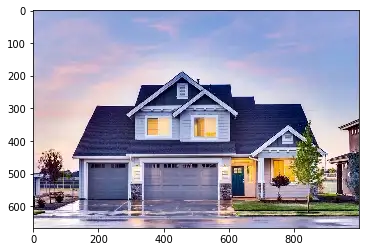

Rotation:
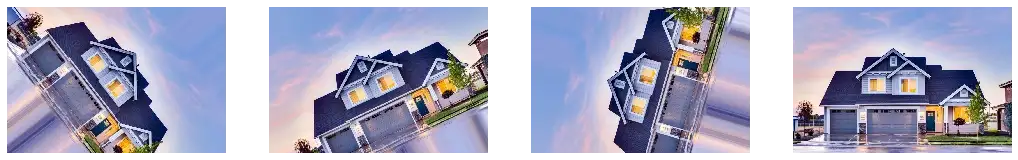

Width Shift:
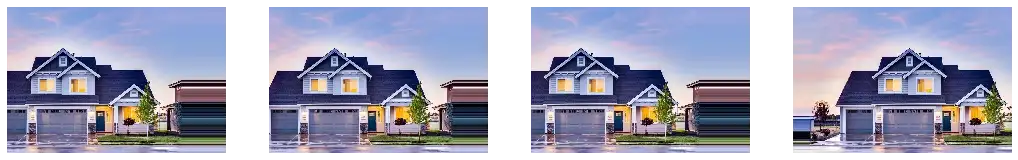

Brigthness:
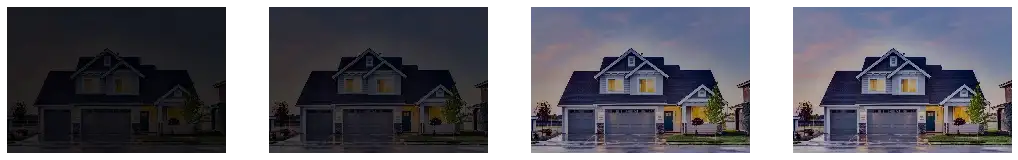

Shear:
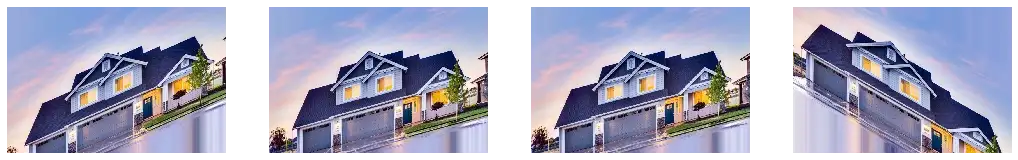


In [153]:
# Gera as imagens de treinamento

training_set = train_datagen.flow_from_directory('training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode="binary",
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode="binary",
                                                    subset='validation')

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [154]:
# Gera as imagens de teste

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('test_set', 
                                            target_size=(64, 64), 
                                            batch_size=1, class_mode="binary")


Found 2023 images belonging to 2 classes.


In [155]:
# Cria o modelo Sequential e adiciona redes ocultas

sequential = Sequential()

# Conv2D é spatial image convolution, 
# "a intensidade do pixel representa o tamanho da gradiente na posição do pixel"
sequential.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=[64,64,3]))

# MaxPool2D "Downsamples the input along its spatial dimensions (height and width) by 
# taking the maximum value over an input window (of size defined by pool_size ) 
# for each channel of the input"
sequential.add(MaxPool2D(pool_size=2, strides=2))

sequential.add(Conv2D(32, 3, padding="same", activation="relu"))
sequential.add(MaxPool2D(pool_size=2, strides=2))

In [156]:
# Flatten transforma em uma única linha, para ser aplicado o Dense
sequential.add(Flatten())


sequential.add(Dense(128, activation="relu"))
sequential.add(Dense(1, activation="sigmoid"))

sequential.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [157]:
sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 13
sequential.fit(x=training_set, validation_data=validation_set, epochs=epochs)


Epoch 1/13
201/201 [==============================] - 48s 233ms/step - loss: 0.6902 - accuracy: 0.5326 - val_loss: 0.6750 - val_accuracy: 0.5746
Epoch 2/13
201/201 [==============================] - 50s 247ms/step - loss: 0.6686 - accuracy: 0.6009 - val_loss: 0.6680 - val_accuracy: 0.6009
Epoch 3/13
201/201 [==============================] - 46s 227ms/step - loss: 0.6526 - accuracy: 0.6235 - val_loss: 0.6413 - val_accuracy: 0.6184
Epoch 4/13
201/201 [==============================] - 45s 222ms/step - loss: 0.6243 - accuracy: 0.6487 - val_loss: 0.6371 - val_accuracy: 0.6415
Epoch 5/13
201/201 [==============================] - 45s 226ms/step - loss: 0.6176 - accuracy: 0.6583 - val_loss: 0.6108 - val_accuracy: 0.6627
Epoch 6/13
201/201 [==============================] - 45s 224ms/step - loss: 0.6122 - accuracy: 0.6619 - val_loss: 0.6353 - val_accuracy: 0.6352
Epoch 7/13
201/201 [==============================] - 45s 221ms/step - loss: 0.5965 - accuracy: 0.6793 - val_loss: 0.5956 - val_ac

In [161]:
sequential.evaluate(test_set)

save_option = tensorflow.saved_model.SaveOptions(experimental_io_device="/job:localhost")
sequential.save(f"sequential{epochs}_differ", options=save_option)


2023/2023 [==============================] - 12s 6ms/step - loss: 0.5742 - accuracy: 0.7088


INFO:tensorflow:Assets written to: sequential13_differ\assets


INFO:tensorflow:Assets written to: sequential13_differ\assets


In [162]:
from tensorflow.keras.preprocessing import image
import numpy as np

for i in range(4):
    test_image = image.load_img(f'single_prediction/cat_or_dog_{i}-.jpg', target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = sequential.predict(test_image)
    training_set.class_indices
    print(result)
    if result[0][0] == 1:
        print(f"{i} - dog")
    else:
        print(f"{i} - cat")

1/1 [==============================] - 0s 31ms/step
[[1.]]
0 - dog
1/1 [==============================] - 0s 32ms/step
[[1.]]
1 - dog
1/1 [==============================] - 0s 28ms/step
[[0.]]
2 - cat
1/1 [==============================] - 0s 30ms/step
[[1.]]
3 - dog


In [141]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow
from PIL import Image
import time

In [163]:
save_option = tensorflow.saved_model.SaveOptions(experimental_io_device="/job:localhost")
model = tensorflow.keras.models.load_model(f"sequential{epochs}_differ")
print(model)

In [164]:
rg = range(26)
for i in rg:
	img = Image.open(f"pred/pred{i}.jpeg")
	img.show()
	test_image = image.load_img(f"pred/pred{i}.jpeg", target_size = (64, 64))
	test_image = image.img_to_array(test_image)
	test_image = np.expand_dims(test_image, axis = 0)
	
	result = model.predict(test_image)
	if result[0][0] == 1:
		print(f"{i} - dog")
	else:
		print(f"{i} - cat")
	time.sleep(2)

1/1 [==============================] - 0s 146ms/step
0 - cat
1/1 [==============================] - 0s 33ms/step
1 - dog
1/1 [==============================] - 0s 38ms/step
2 - cat
1/1 [==============================] - 0s 28ms/step
3 - cat
1/1 [==============================] - 0s 29ms/step
4 - dog
1/1 [==============================] - 0s 30ms/step
5 - cat
1/1 [==============================] - 0s 29ms/step
6 - cat
1/1 [==============================] - 0s 28ms/step
7 - cat
1/1 [==============================] - 0s 28ms/step
8 - cat
1/1 [==============================] - 0s 37ms/step
9 - dog
1/1 [==============================] - 0s 28ms/step
10 - cat
1/1 [==============================] - 0s 27ms/step
11 - dog
1/1 [==============================] - 0s 30ms/step
12 - cat
1/1 [==============================] - 0s 35ms/step
13 - cat
1/1 [==============================] - 0s 53ms/step
14 - cat
1/1 [==============================] - 0s 33ms/step
15 - dog
1/1 [============================